<a href="https://colab.research.google.com/github/ekrell/ams_ai_shortcourse_2025/blob/main/notebooks/AMSAI2025_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMS AI Short Course: Intro to XAI

**AMS AI Short Course**

This Colab Notebook demonstrates using eXplainable AI (XAI) methods to explain tabular models.

**XAI Methods**

- Permutation Feature Importance (PFI)
- Shapley Additive EXplanations (SHAP)

**Machine Learning Model: Laguna Madre Water Temperature Prediction**
- Features: sequence of 6 hourly temperature values (wind and water: 12 feaures)
- Prediction: water temperature (12 hour lead time)
- Multilayer perceptron
- [Dataset source](https://www.sciencedirect.com/science/article/pii/S2352340923008909)

# Introduction

This Notebook focuses on using XAI methods to investigate how the set of input features influence the model.

To do so, we rely on *post-hoc* XAI methods. These methods are applied to arbitrary models after they have been trained. The model itself is treated as a black box, and the XAI methods perturb the input features in various ways to quantify the affect this has on the model output.

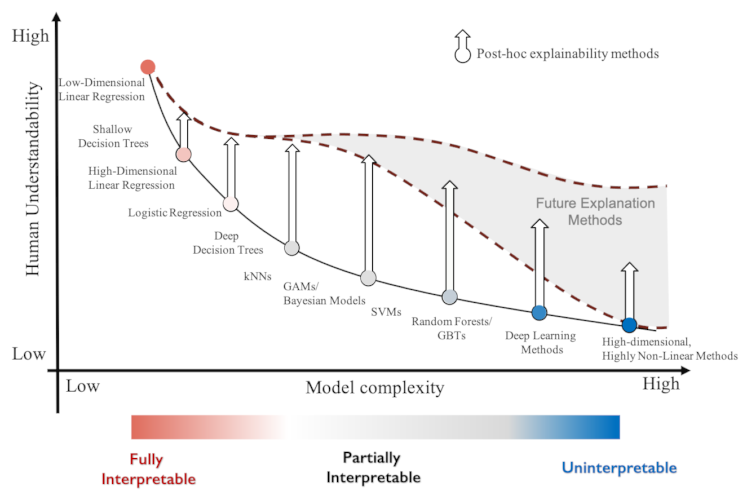

**Source: [Flora et al. (2022, AIES)](https://paperswithcode.com/paper/comparing-explanation-methods-for-traditional-1)**

## Motivation

- **Model debugging:** has the model learned non-physical strategies?
- **Scientific insight:** has the model learned novel relationships of scientific interest?

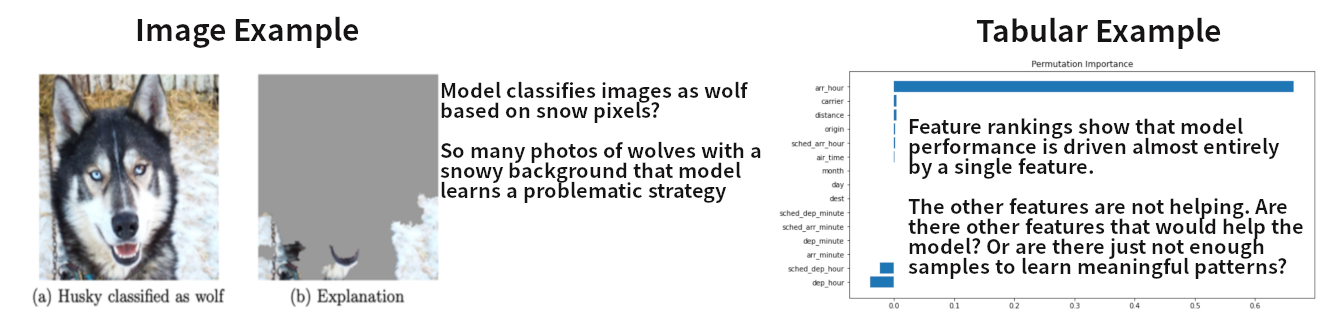

**Sources:**
- [Image Example](https://dl.acm.org/doi/10.1145/2939672.2939778)
- [Tabular Example](https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-from-scikit-learn)

## XAI is challenging

- **Disagreements:** many XAI methods exists and their explanations might not agree. Unclear which to choose.
- **Sensitivity:** even a single method is often sensitive to various parameters
- **Imbalanced data:** global explanations tend to reflect the majority class
- **Correlated features:** often violate XAI method's assumptions which may yeild misleading explanations
- **Verification:** since we don't know the true explanation, hard to verify that the explanation is correct

More complex models tend be more difficult to confidently explain. In general, XAI methods will work better for a simpler model (e.g. MLP) with relatively few tabular features than for a more complex model (e.g. CNN) that uses high-dimensional image inputs.

## Approach


- **Triangulate methods:** when multiple methods provide a similar explanation, it likely suggests something true about the models
- Think of each method as providing **clues** about the model, and various XAI methods are used to investigate the model
- It is important to understand what, exactly, each method reveals about the model. Disagreements might reflect that the methods are looking at the model at different scales, for example.

**Source:** - [McGovern et al., Making the Black Box More Transparent: Understanding the Physical Implications of Machine Learning](https://journals.ametsoc.org/view/journals/bams/100/11/bams-d-18-0195.1.xml)

## Resources



- [Molnar, Interpretable Machine Learning](https://christophmolnar.com/books/interpretable-machine-learning/)
- [McGovern et al., Making the Black Box More Transparent: Understanding the Physical Implications of Machine Learning](https://journals.ametsoc.org/view/journals/bams/100/11/bams-d-18-0195.1.xml)
- [Flora et al., A Machine Learning Explainability Tutorial for Atmospheric Sciences](https://journals.ametsoc.org/view/journals/aies/3/1/AIES-D-23-0018.1.xml)
- [Molnar et al., General Pitfalls of Model-Agnostic Interpretation Methods for Machine Learning Models](https://link.springer.com/chapter/10.1007/978-3-031-04083-2_4)
- [Mamalakis et al., Explainable Artificial Intelligence in Meteorology and Climate Science: Model Fine-Tuning, Calibrating Trust and Learning New Science](https://link.springer.com/chapter/10.1007/978-3-031-04083-2_16)
- [Krell et al., Aggregation strategies to improve XAI for geoscience models that use correlated, high-dimensional rasters](https://www.cambridge.org/core/journals/environmental-data-science/article/aggregation-strategies-to-improve-xai-for-geoscience-models-that-use-correlated-highdimensional-rasters/F6017A23BEF0BD48969225D68DF819A2)

## Global & Local Explanations

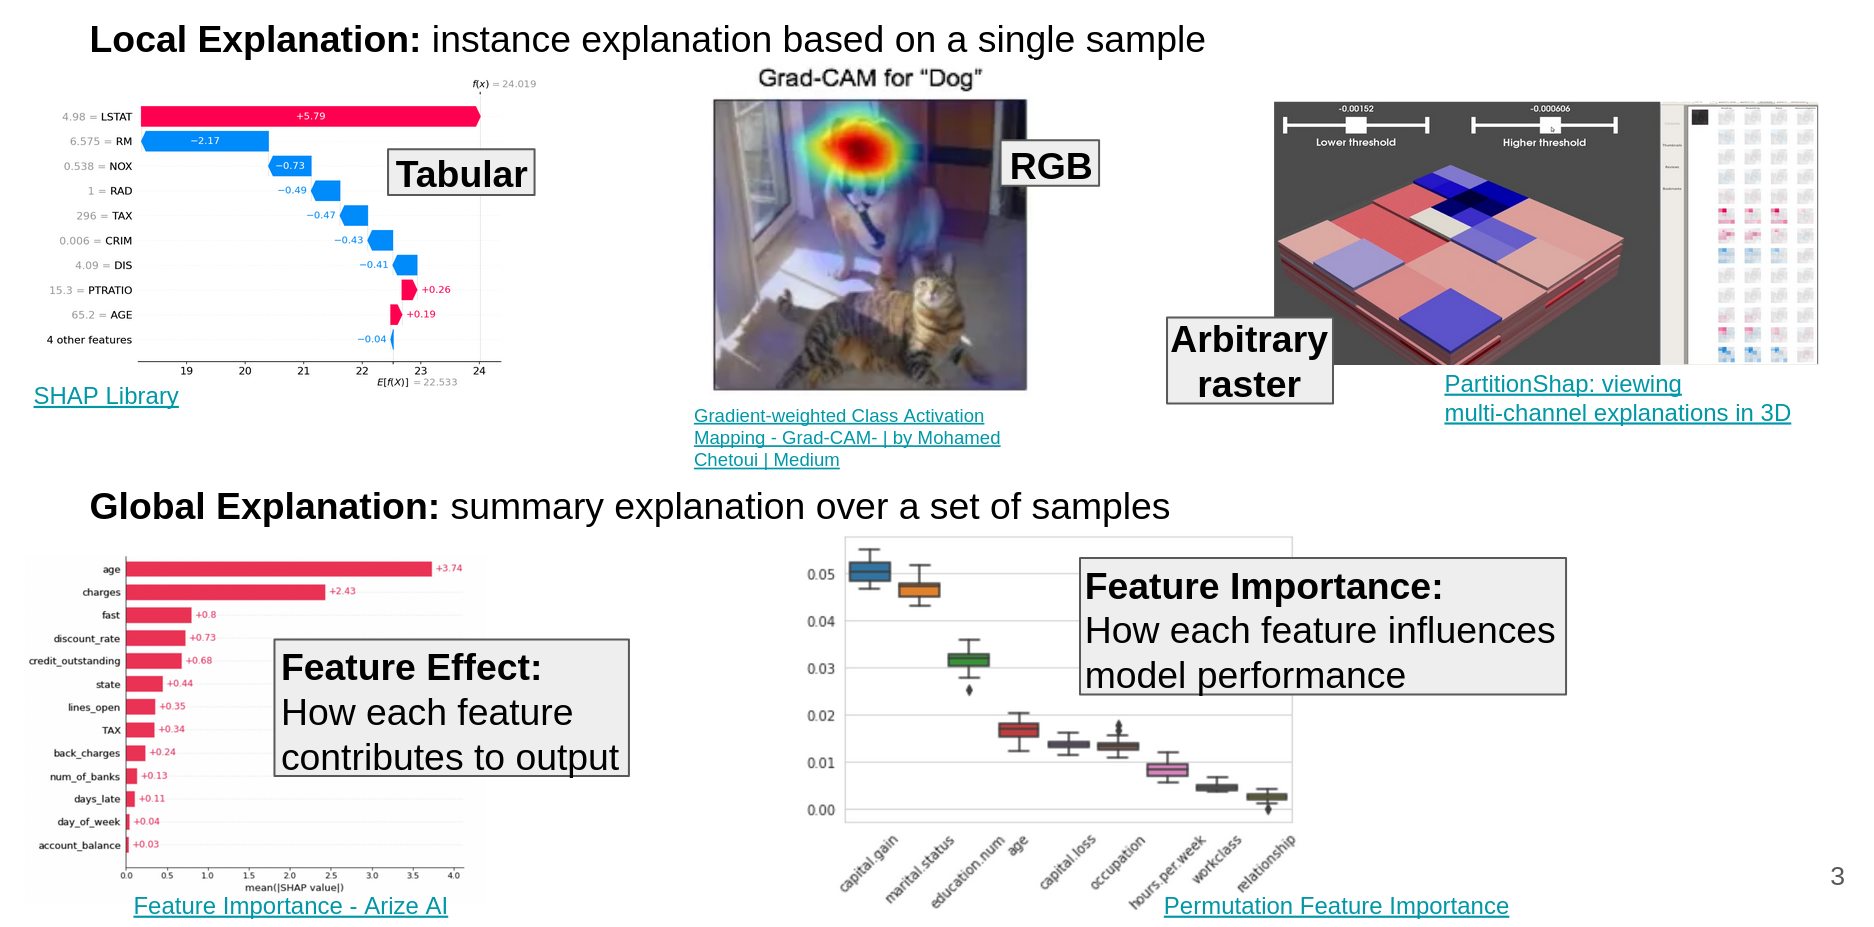

**Local explanation**

Local explanations are computed for an individual sample.

They describe how the model uses a particular data instance to make decisions.

**Global Explanation**

Global explanations summarize information about the entire model based on applying an XAI method to a sizable sample of model inputs.

They answer questions about how the model works in general.

Here, I use **sub-global** to mean that a global XAI method is applied to a selected subset of the cases. For example, to rank feature importance for just the extreme events.



TIP: Global explanations are popular since they give a single summary about what the model learned. With local explanations, it is hard to understand the model based on a large set of local explanations. However, global explanations tend to reflect the average model behavior. For imbalanced datasets, this means that the global explanations really explains what the model uses to make correct reject decisions which we are more likely interested in what the model does when the phenomena is detected. For extreme events, e.g. storms, global explanations are unlikely to be helpful.

## Feature Importance & Feature Effect

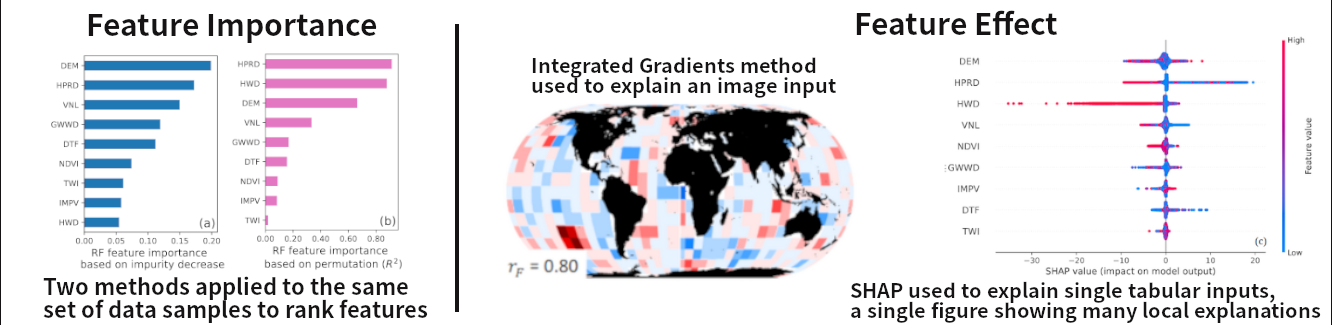

**Feature Importance (FI)**

With FI methods, each feature is assigned an importance score based on how that feature influences model performance.

FI methods are global methods since performance is based on a set of samples. FI methods measure the change in model performance (positive or negative) after modifying the input dataset in some way.

Above, two global explanations were created using FI techniques applied to a Random Forest model. Notice that there are discrepencies between the methods applied to the same model (Source: [Qiao et al. 2024](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10418467)).

**Feature Effect (FE)**

FE methods are based on the change in model output instead of change in model performance. Unlike FI methods, FE methods are local since they assess individual output decisions.

While FE methods are local, a set of FE-based explanations can be aggregated into global explanations. For example, by taking the mean contribution of each feature.

While FE and FI methods are related, they are quite distinct. A feature can be used by the model without helping or hurting overall predictive skill. Even an untrained model with ~0 skill will have randomly initiazed weights that the model uses. But the main appeal of FE methods is to learn what the model does on a case-by-case basis instead of overall.

- Feature Importance: "which features help the model predict hail size?"
- Feature Effect: "why does the model think we'll have huge-sized hail tomorrow?"

In the raster (image) example above, the map shows a pixel-based saliency method called Integrated Gradients. Red means that the pixel contributed positively toward the output and blue means away from. The strength of the color indicates the magnitude of the contribution. (Source: [Mamalakis et al., 2022](https://www.cambridge.org/core/journals/environmental-data-science/article/neural-network-attribution-methods-for-problems-in-geoscience-a-novel-synthetic-benchmark-dataset/DDA562FC7B9A2B30710582861920860E))

The right-hand plot is an example of a global explanation created by combining FE outputs. Each FE output is plotted so that you get a sense of the frequency and magnitude of each feature's effect across a set of sample inputs. (Source: [Qiao et al. 2024](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10418467)).

# Setup

## Set options

In [1]:
# Which years to include in the dataset
selected_years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Model lead time
lead_time_hours = 12

# Number of previous hours to include in predictors
prev_pred_hours = 6

# Pretrained model file (must match the lead time, predictor hours above)
trained_model_url = "https://github.com/ekrell/ams_ai_shortcourse_2025/raw/refs/heads/main/data/laguna_madre_watertemp.keras"

## Load libraries

In [2]:
from google.colab.output import eval_js
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import keras
import tensorflow as tf
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
from keras.models import load_model

## Load dataset

Load the dataset of air and water temperatures for the Laguna Madre in South Texas

In [3]:
selected_years = np.array(selected_years)

remote_directory = "https://raw.githubusercontent.com/conrad-blucher-institute/LagunaMadreWaterAirTempDataCleaner/main/imputed_data"
file_format = "atp_and_wtp_{}.csv"

data_files_remote = [
    remote_directory + "/" + file_format.format(str(year)) \
     for year in selected_years
]

data_files = ["temperature_{}.csv".format(str(year)) for year in selected_years]

for i in range(len(data_files)):
  urllib.request.urlretrieve(data_files_remote[i], data_files[i])

!ls

sample_data	      temperature_2017.csv  temperature_2019.csv  temperature_2021.csv
temperature_2016.csv  temperature_2018.csv  temperature_2020.csv  temperature_2022.csv


In [4]:
# Load all downloaded file into a Pandas data frame
df = pd.concat(map(pd.read_csv, data_files))

# Easier to read column names
df.rename(columns={'dateAndTime'           : 'datetime',
                   'packeryATP_lighthouse' : 'atp',
                   'npsbiWTP_lighthouse'   : 'wtp'}, inplace=True)

# Tell Pandas the "datetime" column, so that we can use Pandas time series functionality
df['datetime'] = pd.to_datetime(df["datetime"])
df = df.set_index('datetime')

df

atp   wtp
datetime                       
2016-01-01 00:00:00  11.3  12.9
2016-01-01 01:00:00  12.0  12.8
2016-01-01 02:00:00  12.0  12.7
2016-01-01 03:00:00  12.4  12.7
2016-01-01 04:00:00  12.7  12.5
...                   ...   ...
2022-12-31 19:00:00  19.8  16.5
2022-12-31 20:00:00  22.3  16.8
2022-12-31 21:00:00  21.4  17.4
2022-12-31 22:00:00  21.8  17.6
2022-12-31 23:00:00  19.1  17.1

[61368 rows x 2 columns]

## Preprocess dataset

The dataset comes in the form of an ordered table of time series values.

But, we need it to be in the form of predictors and targets.

- Targets: single water temperature values in Celsius
- Inputs: a sequence of water temperature values and air temperature values where the most recent is L (lead time) hours before the target. The sequence goes back (N) previous hours.

The following function `split_preds_targets` converts the input dataframe into a set of inputs (`x`) and targets (`y`).

**Preprocessing pipeline:**

1. Replace missing values with mean
2. Normalize predictors
3. Convert to x, y dataset


In [5]:
def split_preds_targets(df, lead_time_hours, target_var="wtp", prev_pred_hours=3):

  data = df.to_numpy()
  n_samples = len(data)

  # Adjust lead time hours to start from end of predictor time series
  lead_time_hours = lead_time_hours + prev_pred_hours

  start_idxs = np.array(range(0, n_samples - prev_pred_hours)).astype(int)
  stop_idxs = start_idxs + prev_pred_hours
  n_train = len(start_idxs)

  x = np.zeros((n_train, data.shape[1] * prev_pred_hours))
  for i in range(n_train):
    x[i] = data[start_idxs[i]:stop_idxs[i]].flatten()
  x = x[:-lead_time_hours]

  y = df[target_var][lead_time_hours:].to_numpy()
  y = y[:-prev_pred_hours]

  feature_names = []
  for i in range(prev_pred_hours):
    for colname in df.columns:
      feature_names.append(colname + "-" + str(prev_pred_hours - i - 1))

  return x, y, feature_names

# Impute missing values with mean
dfi = df.fillna(df.mean())
dfi.index.freq = 'h'

# Normalization
df_all = dfi[dfi.index.year.isin(selected_years)]
# Convert to numpy preds & targets
x, y, feature_names = split_preds_targets(df_all, lead_time_hours, prev_pred_hours=prev_pred_hours)

# Build normalization layer
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(x)

## Load pretrained model

This is a simple multi-layer perceptron (MLP) developed with the `keras` machine learning framework

In [6]:
trained_model_path = "model.keras"
urllib.request.urlretrieve(trained_model_url, trained_model_path)
model = load_model(trained_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**Global performance check**

In [7]:
# Make predictions for all sample
preds = model.predict(x).flatten()

# Calculate the model's r-squared
r2_score(y, preds)

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


0.9599651932460171

**Plot time series of targets and predictions**

Text(0, 0.5, 'Water temperature (Celsius)')

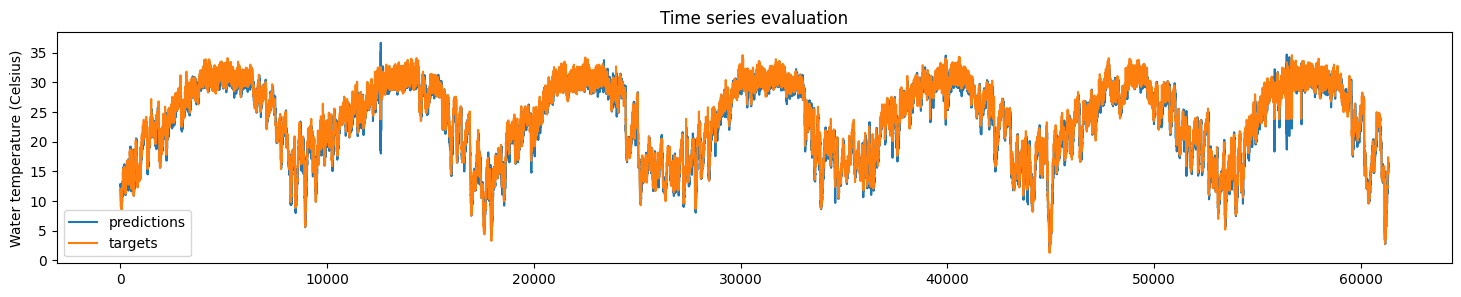

In [8]:
fig, ax = plt.subplots(figsize=(18, 3))
ax.plot(preds, label="predictions")
ax.plot(y, label="targets")
ax.legend()
ax.set_title("Time series evaluation")
ax.set_ylabel("Water temperature (Celsius)")

# Feature Importance


| **Backward, Single-pass**     | **Backward, Multi-pass**      |
| ------------- | ------------- |
| 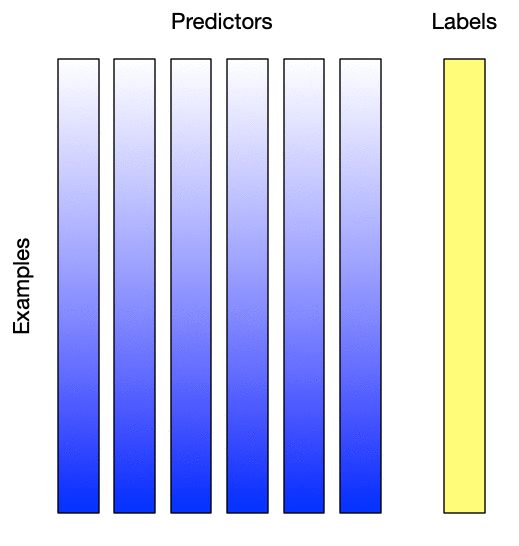 | 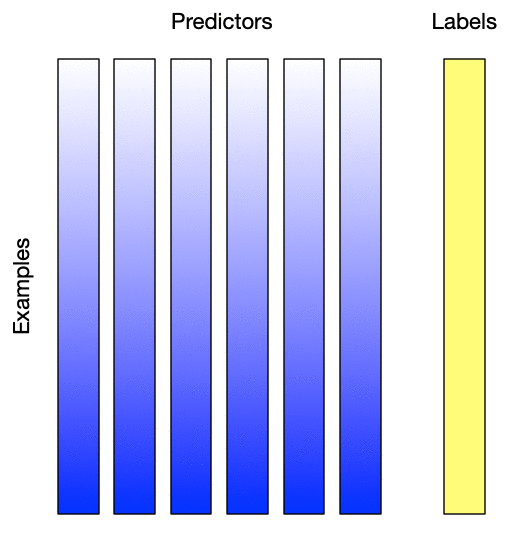 |



**Permutation Feature Importance (PFI)**

The goal of PFI is to rank features based on their influence on model performance. Ideally, each feature is removed to measure the change in performance using some metric such as MSE or a skill score. However, models don't support removing a feature. Instead, the feature's values are permuted to break the correlation between that feature and the target. This simulates removing the feature. Intuitively, if the feature's values don't impact performance then the model must not be using that feature to make decisions.

There are variants of PFI. Typically, when users apply PFI they are using a variant called **backward single-pass**.

Variants:

- **Backward vs Forward**
  - **Backward:** the features start off with their original values and each features are removed by permutation.
  - **Forward:** all features start off permuted and features are added back into the input by restoring their actual non-permuted values
- **Single-pass vs Multi-pass**
  - **Single-pass:** Each feature is evaluated one at a time to rank their importance based on how much each changed performance
  - **Multi-pass:** At each iteration, the top-ranked feature is kept permuted for the next iteration. At each iteration, the top-ranked feature is considered the next highest-ranked.

Backward Multi-pass can be very effective for explaining models whose input features are highly correlated with each other.

A more thorough discussion of these variants in included in [McGovern et al. (2019)](https://journals.ametsoc.org/view/journals/bams/100/11/bams-d-18-0195.1.xml)


**Organization**

1. **PFI from scratch:** a simple implementation of PFI, with variants for handling grouped features and subsets of the cases
2. **PFI from `scikit-explain`:** a Python library by [Monte Flora](https://scikit-explain.readthedocs.io/en/latest/index.html) with has a PFI implementation with many options supported

## PFI from scratch

In _version 1_, we simply take each feature and shuffle its values across dataset samples. For each feature, the PFI value is computed with the difference between the original model performance (here, R-squared) and performance after permutating that feature.

In [9]:
def pfi(x, y, model):
  from sklearn.utils import shuffle

  # x: set of input samples with shape (samples, features)
  # y: set of targets with shape (samples)
  # model: a trained model that, given x, produces predictions

  # Number of input features
  n_features = x.shape[1]
  # Initialize PFI values (to 0)
  pfi_values = np.zeros(n_features)

  # Calculate base model performance (before permutations)
  preds = model.predict(x).flatten()
  base_score = r2_score(y, preds)

  # For each feature
  for fi in range(n_features):
    # Restore the original inputs
    x_ = x.copy()
    # Shuffle just this feature
    x_[:, fi] = shuffle(x[:, fi])
    # Calculate the model performance after permutation
    preds = model.predict(x_).flatten()
    score = r2_score(y, preds)
    # PFI value is the difference in model scores
    pfi_values[fi] = base_score - score

  return pfi_values

### Full Global Explanations

In [10]:
pfi_values_full = pfi(x, y, model)

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Text(0.5, 1.0, 'Permutation Feature Importance')

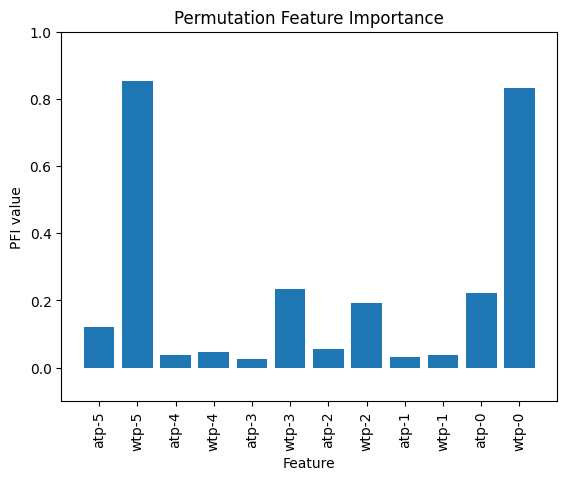

In [11]:
plt.bar(feature_names, pfi_values_full)
plt.ylim(-0.1, 1.0)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("PFI value")
plt.title("Permutation Feature Importance")

**Sanity check:** let's compare our implementation to a popular implementation from `scikit-learn`

The [`scikit-learn` implementation](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) is more flexible that ours:

- `scoring`: method used to calculate model performance. Has several built-in, but also accepts arbitrary functions.
- `n_repeats`: number of times permute (PFI value is the mean).

In [12]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, x, y, n_repeats=4, scoring='r2', random_state=0)

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━

Text(0, 0.5, 'PFI value')

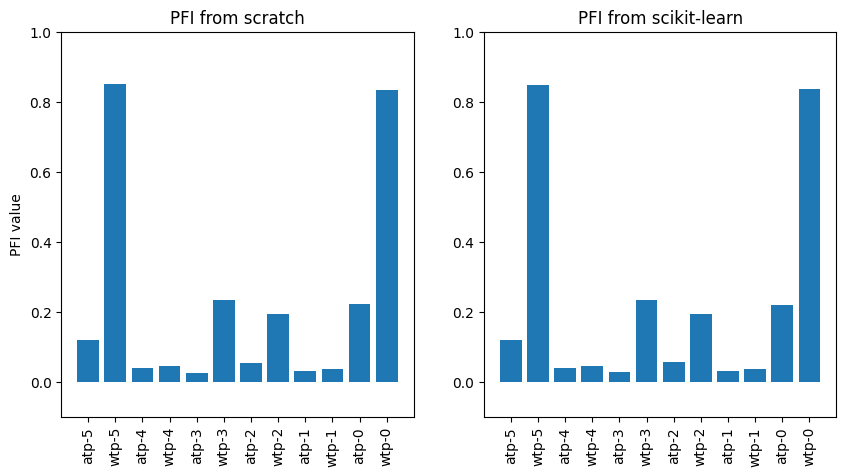

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(feature_names, pfi_values_full)
axs[0].set_title("PFI from scratch")
axs[0].set_ylim(-0.1, 1.0)
axs[0].tick_params(axis='x', labelrotation=90)

axs[1].bar(feature_names, r.importances_mean)
axs[1].set_title("PFI from scikit-learn")
axs[1].set_ylim(-0.1, 1.0)
axs[1].tick_params(axis='x', labelrotation=90)

axs[0].set_ylabel("PFI value")

### Grouped Feature Importance

PFI can be applied to groups of features instead of individual features.

When features are correlated, the feature importance can be distributed among several related features. In isolation, it can look like each has little importance. But, their grouped importance may be considerable. Note this these grouped values can sometimes differ substantially from the summation of non-grouped PFI values.

Grouped PFI is becoming more and more recommeneded for dealing with correlated features, but is not commonly supported by library implementations.

Sources:
- [Au et al., 2022](https://link.springer.com/article/10.1007/s10618-022-00840-5)
- [Gregorutti et al., 2015](https://www.sciencedirect.com/science/article/pii/S0167947315000997?casa_token=SNcMsjlVj5AAAAAA:mImMflOeJqUZc1aoJuDUriRW-C9jCoKJgM4Ih9rRamym8cIEg4kkbynqPzD-Ws0tTqyX7tHhvEAc)
- [Kuzudisli et al, 2023](https://peerj.com/articles/15666/)

By grouping the features in different ways, we can **pose different questions about how the features influence the model**.


**Note:** while tabular features can benefit from grouped features, recent studies have shown that grouped features are almost always essential for working with more complex inputs such as image data. See [Krell et al., 2023](https://www.cambridge.org/core/journals/environmental-data-science/article/aggregation-strategies-to-improve-xai-for-geoscience-models-that-use-correlated-highdimensional-rasters/F6017A23BEF0BD48969225D68DF819A2) for more information, or Evan Krell's AMS talk this Tuesday in session [_Exploring the Pipeline from Trustworthy AI to Effective Delivery of Decision-Support Services_](https://ams.confex.com/ams/105ANNUAL/meetingapp.cgi/Paper/448846).

Below, _version 2_ of our PFI implementation supports grouped feature importance. Simply, all features in a group are shuffled simultaneously.

In [14]:
def pfi_2(x, y, model, groups=None):
  from sklearn.utils import shuffle

  # groups: A list of groups. Each group is a list of indices to features within that groups.
  #   example; [[1, 3, 5], [2, 4]] defines two groups with elements (1, 3, 5) in group 1 and (2, 4) in group 2

  # If no groups are provided, each feature is a group
  if groups is None:
    groups = [[i] for i in range(x.shape[1])]

  n_groups = len(groups)
  pfi_values = np.zeros(n_groups)

  # Initial model performance
  preds = model.predict(x).flatten()
  base_score = r2_score(y, preds)

  for gi, group in enumerate(groups):
    g = np.array(group)
    x_ = x.copy()

    # Permute each feature within the group
    # (separately, since each feature should be shuffled among its own distribution)
    for fi in g:
      x_[:, fi] = shuffle(x[:, fi])

    preds = model.predict(x_).flatten()
    score = r2_score(y, preds)
    pfi_values[gi] = base_score - score

  return pfi_values

In [15]:
pfi_values = pfi_2(x, y, model)

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


#### Group by Variable

In [16]:
variables = [fname.split("-")[0] for fname in feature_names]
feature_groups = [list(filter(lambda x: group in x, feature_names)) for group in np.unique(variables)]
feature_groups

[['atp-5', 'atp-4', 'atp-3', 'atp-2', 'atp-1', 'atp-0'],
 ['wtp-5', 'wtp-4', 'wtp-3', 'wtp-2', 'wtp-1', 'wtp-0']]

In [17]:
feature_groups_idxs = np.array([[np.where(np.array(feature_names) == g)[0][0] for g in feature_groups[i]] for i in range(len(feature_groups))])
feature_groups_idxs

array([[ 0,  2,  4,  6,  8, 10],
       [ 1,  3,  5,  7,  9, 11]])

In [18]:
pfi_values = pfi_2(x, y, model, feature_groups_idxs)

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [19]:
pfi_values

array([0.23295359, 1.71539032])

Text(0.5, 1.0, 'Grouped PFI (Variables)')

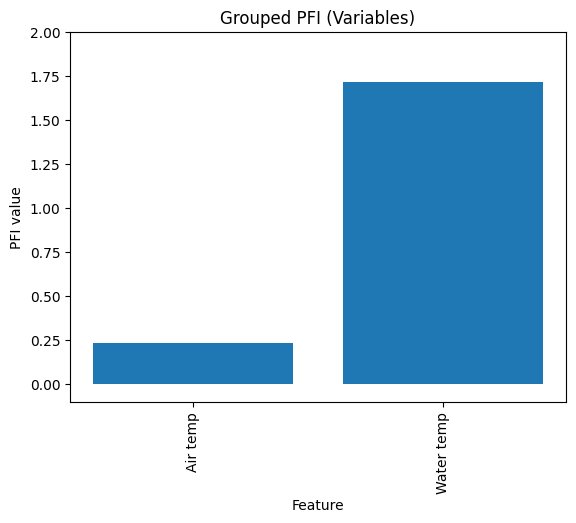

In [20]:
plt.bar(["Air temp", "Water temp"], pfi_values)
plt.ylim(-0.1, 2.0)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("PFI value")
plt.title("Grouped PFI (Variables)")

#### Group by Time Step

In [21]:
variables = [fname.split("-")[1] for fname in feature_names]
feature_groups = [list(filter(lambda x: group in x, feature_names)) for group in np.unique(variables)]
feature_groups.reverse() # For consistency with other plots
feature_groups

[['atp-5', 'wtp-5'],
 ['atp-4', 'wtp-4'],
 ['atp-3', 'wtp-3'],
 ['atp-2', 'wtp-2'],
 ['atp-1', 'wtp-1'],
 ['atp-0', 'wtp-0']]

In [22]:
feature_groups_idxs = np.array([[np.where(np.array(feature_names) == g)[0][0] for g in feature_groups[i]] for i in range(len(feature_groups))])
feature_groups_idxs

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [23]:
pfi_values = pfi_2(x, y, model, feature_groups_idxs)

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Text(0.5, 1.0, 'Grouped PFI (Time Step)')

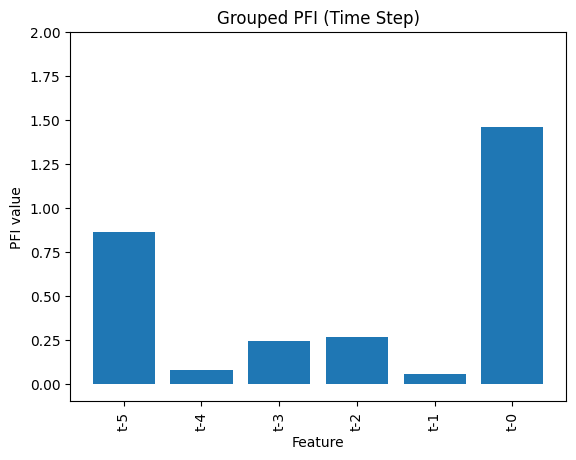

In [24]:
time_step_labels = ["t-{}".format(fg[0].split("-")[-1]) for fg in feature_groups]
plt.bar(time_step_labels, pfi_values)
plt.ylim(-0.1, 2.0)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("PFI value")
plt.title("Grouped PFI (Time Step)")

### Sub-Global Feature Importance

A major problem with the above PFI scores is that they are calculated based on the performance of a large dataset.

But, this dataset is highly imbalanced. The overall model performance might not reflect the importance of the cases that we are interested it: the extreme cases.

Here, we really want to know which variables are important for the cold-stun cases, or, where the temperature is <= 8 degrees Celsius.

The naive way is to simply use our existing PFI implementation, but with a selected set of (x, y) samples. **But, this limits the distribution of values used in the shuffling!** So, we aren't replacing extreme case values with non-extreme case values, which may greatly impact the scores.

In the implementation below, the full dataset is provided for the shuffling. But only the selected cases are used for calculating model performance.

In [25]:
def pfi_3(x, y, model, groups=None, cases=None):
  from sklearn.utils import shuffle

  # cases: a list of indices of the cases to include

  if groups is None:
    groups = [[i] for i in range(x.shape[1])]

  # If no cases are provided, then use all cases in dataset x
  if cases is None:
    cases = range(x.shape[0])
  cases = np.array(cases)

  n_groups = len(groups)
  pfi_values = np.zeros(n_groups)

  # Calculate base score using only selected cases
  preds = model.predict(x[cases]).flatten()
  base_score = r2_score(y[cases], preds)

  for gi, group in enumerate(groups):
    g = np.array(group)
    x_ = x.copy()

    for fi in g:
      # Permute entire dataset
      x_[:, fi] = shuffle(x[:, fi])

    # Only predict for the selected cases
    preds = model.predict(x_[cases]).flatten()
    score = r2_score(y[cases], preds)

    pfi_values[gi] = base_score - score

  return pfi_values

**Select extreme cases based on cold-stun threshold**

In [26]:
cold_stun_threshold = 8.0
cases_extr = np.where(y < cold_stun_threshold)[0]
pfi_values_extr = pfi_3(x, y, model, cases=cases_extr)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


**Select random cases, same number as cold-stun cases**

In [27]:
np.random.seed(0)
n_cases = cases_extr.shape[0]
cases_rand = np.random.randint(0, x.shape[0], n_cases)
pfi_values_rand = pfi_3(x, y, model, cases=cases_rand)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(0.5, 0, 'Feature')

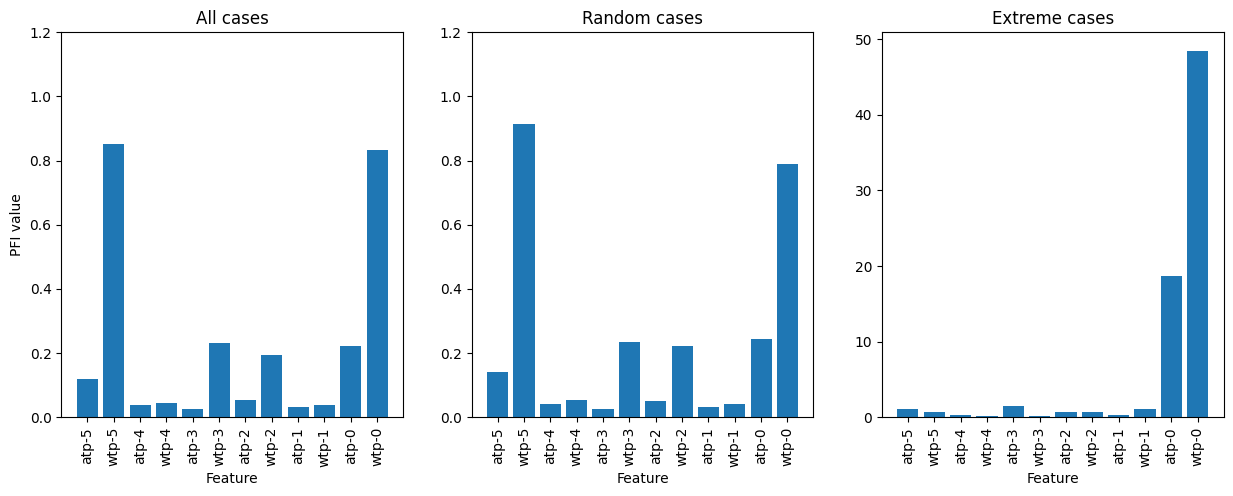

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(feature_names, pfi_values_full)
axs[0].set_title("All cases")
axs[0].set_ylim(0, 1.2)
axs[0].tick_params(axis='x', labelrotation=90)
axs[1].bar(feature_names, pfi_values_rand)
axs[1].set_title("Random cases")
axs[1].set_ylim(0, 1.2)
axs[1].tick_params(axis='x', labelrotation=90)
axs[2].bar(feature_names, pfi_values_extr)
axs[2].set_title("Extreme cases")
axs[2].tick_params(axis='x', labelrotation=90)

axs[0].set_ylabel("PFI value")
axs[0].set_xlabel("Feature")
axs[1].set_xlabel("Feature")
axs[2].set_xlabel("Feature")

## PFI from `scikit-explain`

`scikit-explain` is a Python library that supports many XAI methods. It is made to be compatable with, in the style of, the very popular `scikit-learn`. They also provide [very helpful tutorial notebooks](https://github.com/monte-flora/scikit-explain)!

Unlike our implementation, the `scikit-explain` version supports backward/forward and single-/multi-pass options.


In [29]:
!pip install scikit-explain -q
import skexplain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:00


**Setup**

In [30]:
# First, we configure our models
estimators = [('watertemp',     # We can name it anything
               model)]          # But we need to provide our trained model

# Then, we setup the explainer by proving the model, data, and feature names
explainer = skexplain.ExplainToolkit(estimators, X=x, y=y, feature_names=feature_names)

### Backkward Single-pass

(Or, the typical PFI implementation as in our from-scratch version)

In [31]:
results = explainer.permutation_importance(
                                          n_vars=1,
                                          evaluation_fn='mse',
                                          n_permute=1,
                                          subsample=1,
                                          n_jobs=1,                  # n_jobs broken??
                                          verbose=True,
                                          random_seed=42,
                                          direction='backward',
                                            )

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


Perm. Imp.:   0%|          | 0/1 [00:00<?, ?it/s]

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Perm. Imp.: 100%|██████████| 1/1 [01:03<00:00, 63.94s/it]


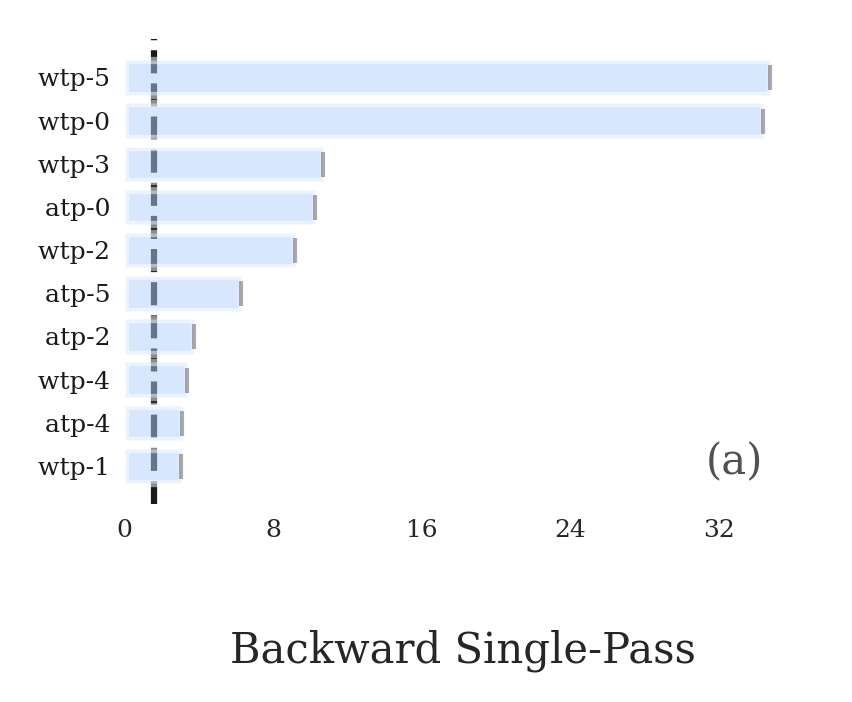

In [32]:
fig = explainer.plot_importance(data=results,
                                panels=[('backward_singlepass', 'watertemp')],
                                 )

### Backward Multi-pass

In [33]:
results = explainer.permutation_importance(
                                           n_vars=5,  # Change from single-pass (1) to multi-pass
                                           evaluation_fn='mse',
                                           n_permute=1,
                                           subsample=1,
                                           n_jobs=1,
                                           verbose=True,
                                           random_seed=42,
                                           direction='backward',
                                              )

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


Perm. Imp.:   0%|          | 0/5 [00:00<?, ?it/s]

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


Perm. Imp.:  20%|██        | 1/5 [01:06<04:24, 66.10s/it]

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Perm. Imp.:  40%|████      | 2/5 [01:51<02:42, 54.19s/it]

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


Perm. Imp.:  60%|██████    | 3/5 [02:33<01:36, 48.41s/it]

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


Perm. Imp.:  80%|████████  | 4/5 [03:12<00:44, 44.63s/it]

1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Perm. Imp.: 100%|██████████| 5/5 [03:44<00:00, 44.82s/it]


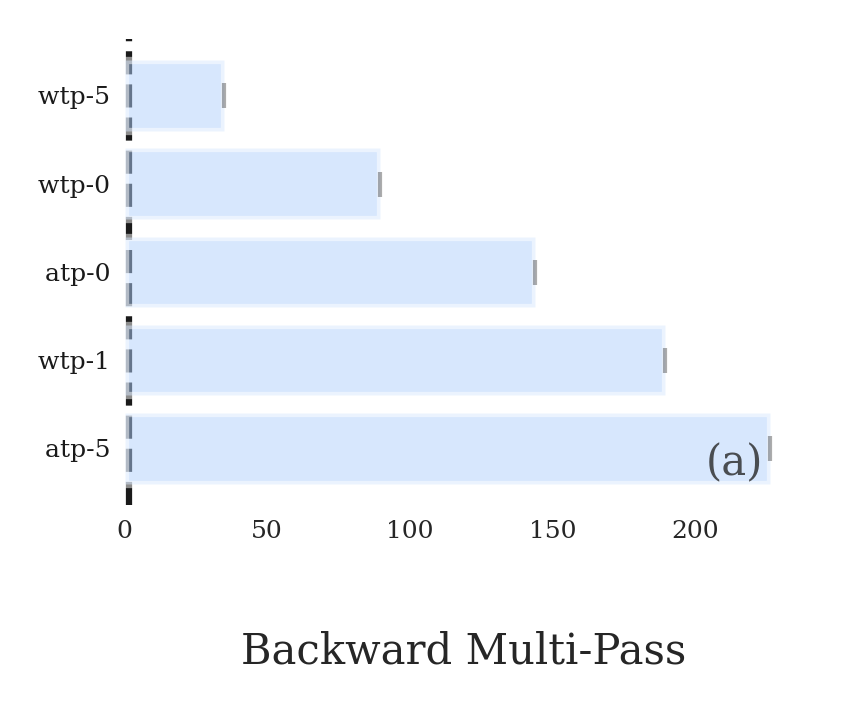

In [34]:
fig = explainer.plot_importance(data=results, panels=[('backward_multipass', 'watertemp')],)

The above is potentially confusing! The rankings are similar to the Backward Single-Pass, but the bars are getting bigger from top to bottom.

To clarify:

- The features are ranked from high to low: wtp-5 is most importand and atp-5 is least.
- After each iteration, we *hold the selected features in their permuted states*. Thus, it makes sense the model performance continues to degrade with **more and more features being removed**.

**Note:** with the option `direction='forward'`, you can switch from backward to forward PFI. With forward PFI, we start by permuting all features. That is we start with all features removed and add features. So, we see which feature increases performance when added. I don't show it here, but re-run the above example with `direction='forward'` and compare the rankings.

# Feature Effect

**SHapley Additive Explanations (SHAP)**

SHAP is a _much_ more involved algorithm in terms of both (1) computational complexity and (2) mathematical description. Here, I'll try to briefly sketch out the problem they try to solve and why this makes them so slow.

**Shapley Values**

- Shapley values come from cooperative game theory
- Their purpose is to assign credit to the players of a cooperative game, based on their contribution to the game's outcome
- So, if player **x** contributed more to winning than player **y**, **x** should receive more payment
- For XAI, a Shapley value represents **how much the player (feature) contributed to the game (model output)**

**A motivating scenario**

- Consider a game with 5 players: 2 are skilled and 3 have never played
- Either skilled player (**x1** or **x2**) are capable of winning the game on their own
- So if we remove (e.g. permute) **x1**, the team still wins the game... so the game outcome doesn't change
- If the outcome doesn't change, it looks like **x1** was not a useful player (no contribution to model output)
- But the same is true if we remove **x2**... so neither of the skilled players contribute to winning the game?
- Consider removing **x1** and **x2**: now they lose the game: clearly they were important.
- **Shapley values take into account this situation and consider all possible combinations of removing the other players when assessing each player**
- Thus, calculating Shapley values is quite robust but has **combinatorial complexity!!**

**SHAP**

- SHAP re-formulates Shapley values with a linear equation where the coefficients are the Shapley values
- Except they are now called the SHAP values
- Because sampling is used to fit that equation and extract the coefficients. So they aren't exactly Shapley values
- The feature correlations are taken into account because of the sampling over combinations of removed feature groups
- But the feature correlations are ignored when fitting the linear function, since coefficients are assumed independent

**Compared to many other XAI methods, SHAP puts great computational expense to take data correlations and relationships into account, but is not a panacea and correlated features can still influence the explanations**


**Resources**
- [Lundberg & Lee (2017): Original SHAP paper](https://dl.acm.org/doi/10.5555/3295222.3295230)
- [Molnar's chapter on SHAP (much easier to read...)](https://christophm.github.io/interpretable-ml-book/shap.html)


In [35]:
import shap
import matplotlib

## Local Feature Effect

In [36]:
# Setup SHAP explainer
explainer = shap.KernelExplainer(model, data=shap.kmeans(x, 50))

How many samples do we need?

**100 samples**

In [37]:
shap_values_single = explainer.shap_values(x[0], nsamples=100)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single[:,0], feature_names=feature_names)

**1,000 samples**

In [38]:
shap_values_single = explainer.shap_values(x[0], nsamples=1000)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single[:,0], feature_names=feature_names)

**10,000 samples**

In [39]:
shap_values_single = explainer.shap_values(x[0], nsamples=10000)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single[:,0], feature_names=feature_names)

In practice, we should try with more cases. But for this notebook, we'll use this simple text to say that 1000 samples (SHAP evaluations) is more than enough.

### Random samples

In [40]:
shap_values_rand = explainer.shap_values(x[cases_rand[:100]], nsamples=1000)

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_rand[0,:,0], feature_names=feature_names)

In [42]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_rand[4,:,0], feature_names=feature_names)

In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_rand[1,:,0], feature_names=feature_names)

### Extreme samples

In [44]:
shap_values_extr = explainer.shap_values(x[cases_extr[:100]], nsamples=1000)

  0%|          | 0/100 [00:00<?, ?it/s]

In [45]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_extr[1,:,0], feature_names=feature_names)

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_extr[2,:,0], feature_names=feature_names)

In [47]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_extr[16,:,0], feature_names=feature_names)

## Global (Aggregate) Feature Effect

By visualizing a group of local explanations, you can achieve a global view of the model. But, unlike the global FI methods, the unique information for each local explanation is preserved. So, it is possible to consider not only the mean effect, but spot outliers as well.

### Beeswarm plots

> The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output. Each instance the given explanation is represented by a single dot on each feature row. The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) of that feature, and dots “pile up” along each feature row to show density. Color is used to display the original value of a feature (shap_values.data[instance,feature]). In the plot below we can see that Age is the most important feature on average, and than young (blue) people are less likely to make over \$50k.

- From the [SHAP documentation](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html)

**Random samples**

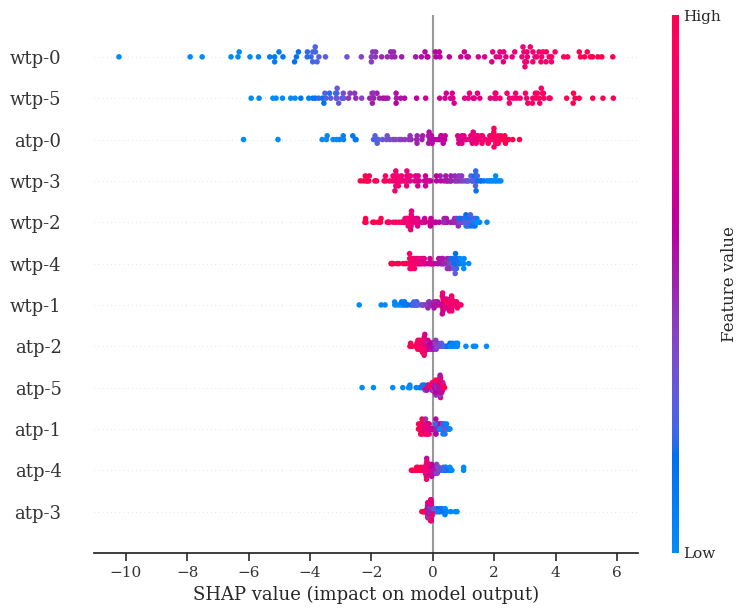

In [48]:
shap.summary_plot(shap_values_rand[:,:,0], x[cases_rand[:100],:], feature_names=feature_names)

**Extreme case samples**

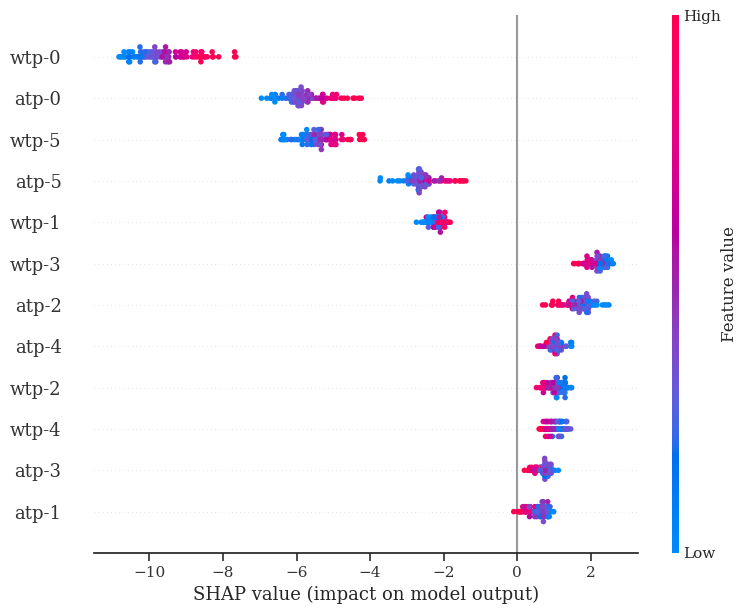

In [49]:
shap.summary_plot(shap_values_extr[:,:,0], x[cases_extr[:100],:], feature_names=feature_names)

### Stacked force plots

These are similar to the single force plots that we used above to plot individual explanations. But, they are stacked and rotated 90 degrees in an interactive chart. These are ordered by the model output value, to visualize relationships between SHAP values and model outputs.

In [50]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values_rand[:,:,0], feature_names=feature_names)

In [51]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values_extr[:,:,0], feature_names=feature_names)

### Mean Bar Plots

These are feature effect rankings make based on the mean absolute value of each feature. An easy visual that allows for direct comparison with the PFI rankings, but throws away the variation that makes local explanations interesting.

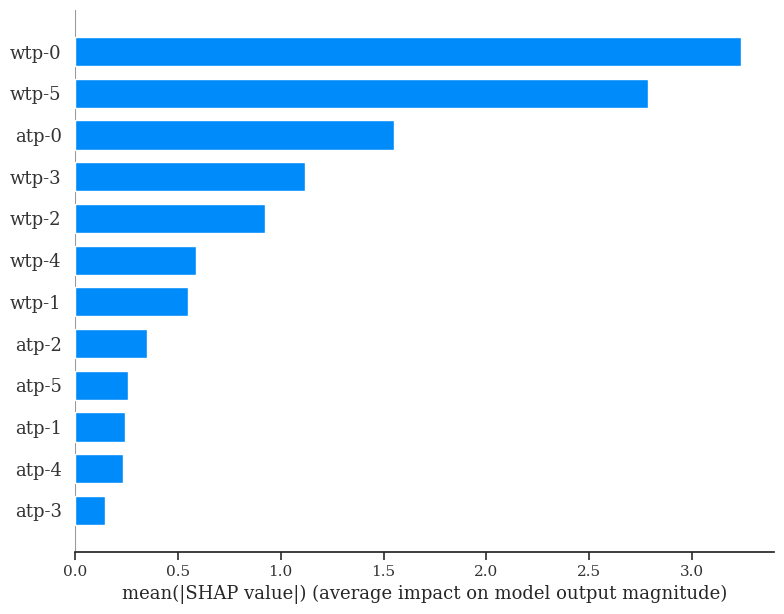

In [52]:
shap.initjs()
shap.summary_plot(shap_values_rand[:,:,0], x[cases_rand[:100],:], feature_names=feature_names, plot_type="bar")

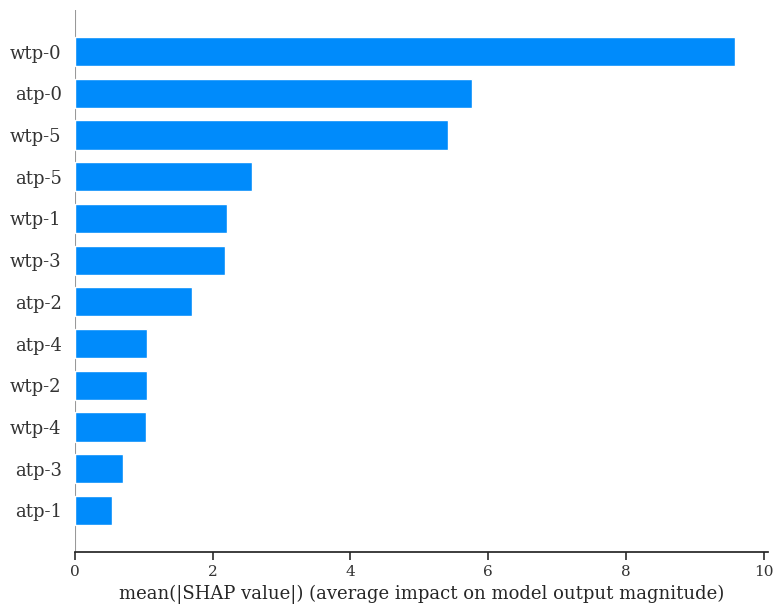

In [53]:
shap.initjs()
shap.summary_plot(shap_values_extr[:,:,0], x[cases_extr[:100],:], feature_names=feature_names, plot_type="bar")

## Grouped SHAP values

Like FI, we can group features to compute their grouped FE values. However, there is limited support for this is Python libraries.

### Attempt 1: `shapash` library

This is another SHAP library that has the ability to generate a web application to interact with the explanations. But, it also seems to have support for grouped explanations, so let's try it out.

In [54]:
!pip install shapash
from shapash import SmartExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.6 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013919 sha256=2b96aebd45c0b5146d9e382ee81b89890a0153a462f9f61ef8e00e39033513f8
  Stored in directory: /root/.cache

In [55]:
# Select 10 of our randomly selected cases

# shapash requires the input data to be a Pandas dataframe
df_x = pd.DataFrame(x[cases_rand][:10], columns=feature_names)
df_x

atp-5  wtp-5  atp-4  wtp-4  atp-3  wtp-3  atp-2  wtp-2  atp-1  wtp-1  \
0   24.2   27.9   24.1   28.3   24.2   27.9   23.8   28.1   23.8   28.3   
1   16.5   17.1   16.2   17.0   15.3   16.7   14.8   16.4   14.2   16.3   
2   22.7   24.5   24.1   24.2   24.7   24.5   25.1   24.7   25.4   24.8   
3   21.3   19.3   21.1   19.1   20.9   19.0   20.8   18.8   20.8   18.7   
4   20.5   23.2   20.2   23.1   20.4   23.6   21.0   23.0   20.4   22.9   
5   27.8   31.2   27.7   30.8   27.4   30.5   27.4   30.3   27.5   29.9   
6   30.5   31.2   30.5   31.5   30.3   31.7   29.9   31.5   30.0   31.3   
7   28.0   29.5   27.5   29.8   28.6   30.2   28.2   30.9   28.9   31.5   
8   28.5   28.3   28.8   28.7   28.8   29.1   28.5   29.4   28.6   29.6   
9   30.9   31.4   30.4   31.9   30.3   32.1   30.4   32.2   29.9   31.6   

   atp-0  wtp-0  
0   23.7   27.5  
1   14.5   16.1  
2   26.3   25.1  
3   20.8   18.7  
4   20.4   22.9  
5   27.2   29.6  
6   29.6   31.1  
7   29.1   32.0  
8   28.5   29.6  
9   30.0   31.9

In [56]:
features_groups = {
    "atp" : ["atp-5", "atp-4", "atp-3", "atp-2", "atp-1", "atp-0",],
    "wtp" : ["wtp-5", "wtp-4", "wtp-3", "wtp-2", "wtp-1", "wtp-0",],
}

In [57]:
# Build the Explainer object
xpl = SmartExplainer(
    model=model,
    features_groups=features_groups,   # Provide our feature groups
)

In [58]:
xpl.compile(x=df_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
INFO: Shap explainer type - shap.explainers.PermutationExplainer()
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


PermutationExplainer explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


PermutationExplainer explainer:  30%|███       | 3/10 [00:19<00:15,  2.15s/it]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


PermutationExplainer explainer:  40%|████      | 4/10 [00:25<00:23,  3.94s/it]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


PermutationExplainer explainer:  50%|█████     | 5/10 [00:31<00:21,  4.36s/it]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


PermutationExplainer explainer:  60%|██████    | 6/10 [00:35<00:17,  4.30s/it]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer:  70%|███████   | 7/10 [00:40<00:13,  4.49s/it]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


PermutationExplainer explainer:  80%|████████  | 8/10 [00:42<00:07,  3.71s/it]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer:  90%|█████████ | 9/10 [00:44<00:03,  3.24s/it]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


PermutationExplainer explainer: 100%|██████████| 10/10 [00:46<00:00,  2.91s/it]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


PermutationExplainer explainer: 11it [00:48,  4.87s/it]


In [59]:
# Plot the mean absolute feature importance for the groups
xpl.plot.features_importance()

Based on the above... looks like it worked! We have two SHAP values. The relative FE between water and air temperature is similar to that of our FI results, as expected.

But... what is going on with this next plot?

In [60]:
xpl.plot.features_importance(display_groups=False)

If SHAP values were calculated for two groups, how is it possible to extract SHAP values for the individual features?

**We didn't actually run SHAP on groups! Instead, SHAP was applied to each feature and a group SHAP value was computed by simply summing the group members' SHAP values.**

In theory, Shapley values are additive: the group SHAP value is equal to the sum of its members. But, in practice, the computational shortcuts used by SHAP can violate this.

So, while the summation-based grouped SHAP values could be of interest, they aren't comparable to how we generated grouped PFI values.

See [this discussion](https://stats.stackexchange.com/a/610428) for more details on how correlated features can cause the grouped SHAP value to differ from a summation of SHAP values.

### Attempt 2: hacking the SHAP library

In the following, we will trick SHAP into explaining grouped features.

The SHAP library expects:

1. A **model function** that accepts a batch of permuted inputs and outputs predictions for the batch
2. An **input vector** to explain

For our hack, we will provide a **binary mask feature** where each group is one feature. The SHAP library will take this and permute it by chaning the ones to zeros. We will also provide a **model wrapper function** that takes this binary mask and applies it to the actual sample.

For example:

- Sample data: [0, 1, 2, 3, 4, 5]
- Group 1:  [0, 2, 4]
- Group 2: [1, 3, 5]

We define the binary feature mask: [1, 1]

SHAP will permute this input. For example, producing [1, 0]. This input means, "keep group 1 features, and permute group 2 features". In our wrapper function, we will manually do this.

This simple implementation could be improved! The _for loop_ in the wrapper function could be vectorized. In addition, it could be made to accept a batch of samples instead of a single sample. For the short course, I prioritized simplicty for readability.

In [61]:
# Define the groups using feature indices
groups = np.array([
    [0, 1],           # Group 1: t-5
    [2, 3],           # Group 2: t-4
    [4, 5],           # Group 3: t-3
    [6, 7],           # Group 4: t-2
    [8, 9],           # Group 5: t-1
    [10, 11]          # Group 6: t-0
])

In [62]:
# Initialize the "input feature" that SHAP will permute (binary mask)
n_groups = len(groups)
feature_mask = np.ones(n_groups).astype(int)
# Number of elements = number of group = number of SHAP values

# Set the mask value (feature replacement)
mask_values = np.mean(x, axis=0)

# Select the sample to explain
sample = x[cases_rand[0]]

# Package all of these to provide to the SHAP model wrapper
pkg = [sample, model, groups, mask_values]

In [63]:
def model_shap(feature_mask):

    # Extract options from package (since the SHAP function should have only one option, the perturbed feature)
    sample = pkg[0]
    model = pkg[1]
    groups = pkg[2]
    mask_values = pkg[3]

    # Force the masks to be bool values
    masks = np.logical_not(feature_mask.astype("bool"))
    n_masks, n_features = masks.shape

    # Init a batch of samples by repeating the unperturbed sample
    x_batch = np.tile(sample, (n_masks, 1))

    # For each mask, perturb the values of those features included in the group to perturb
    for i in range(n_masks):
      perm_groups = groups[masks[i]].flatten()
      x_batch[i, perm_groups] = mask_values[perm_groups]

    # Evaluate batch
    res = model(x_batch).numpy()
    return res

In [64]:
# Background data for SHAP. Zeros so that the binary input get set to 0 (means mask)
background = np.zeros((1, n_groups))
explainer = shap.KernelExplainer(model_shap, background)

In [65]:
shap_values = explainer.shap_values(feature_mask, nsamples=1000)

In [66]:
shap_values

array([[ 4.11281439],
       [-0.85435022],
       [-1.53029353],
       [-1.89970067],
       [-0.0163648 ],
       [ 3.16633797]])

Text(0.5, 1.0, 'Grouped SHAP (Time Step)')

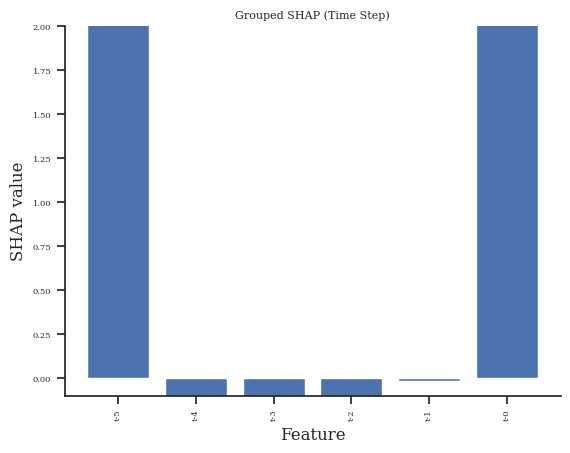

In [67]:
plt.bar(time_step_labels, shap_values[:,0])
plt.ylim(-0.1, 2.0)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("SHAP value")
plt.title("Grouped SHAP (Time Step)")

**Sanity check:** compare to SHAP value computed with all features

In [68]:
# Sum of grouped SHAP values
print("Number of SHAP values: ", len(shap_values))
print("Sum of SHAP values: ", np.sum(shap_values))

Number of SHAP values:  6
Sum of SHAP values:  2.978443145751953


In [69]:
# Sum of feature SHAP values
print("Number of SHAP values: ", len(shap_values_rand[0]))
print("Sum of SHAP values: ", np.sum(shap_values_rand[0]))

Number of SHAP values:  12
Sum of SHAP values:  3.198368121723061


In [70]:
print("Model prediction:", model(x[cases_rand[0]:cases_rand[0]+1,]).numpy()[0][0])

Model prediction: 27.128735


In [71]:
print("Model prediction - mean prediction:", model(x[cases_rand[0]:cases_rand[0]+1,]).numpy()[0][0] - np.mean(preds))

Model prediction - mean prediction: 3.5010414


# Summary

- Can produce local and global explanations using Feature Importance and Feature Effect methods
- By implementing PFI, have some insight into how these methods work
- Understand that the methods employ various _hacks_ to simulate _feature removal_
- Can apply XAI methods to individual features or to grouped features
- Can apply FI methods to strategically selected data subsets
  - Understand that naively doing so can impact results if the permutations are limited to the distribution of the subset


**In this example (water temperature prediction), we found that:**

- Water temperature variables dominated air temperature
- But, air temperature provided non-negligable performance gains
- Grouping by variable and time step did not substantially impact our interpretation, which gives confidence that we can analyze the individual features explanations
- However, we found that the extreme cases (cold stun cases) are **very** reliant on t-1 water temperature, compared to the full dataset. Without that most recent observation, performance for cold stun cases tanks